#### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

#### Loading the Model

In [2]:
model = joblib.load(r'../Model/Text-Model.joblib')
model

,steps,"[('cv', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


#### Loading the Testing Set

In [3]:
test = pd.read_csv(r'../Dataset/testing_dataset.csv')
test.head()

,statement,emotion
0,Cody wont be coming anywhere NEAR where I live...,sadness
1,Woah not annoyed much JustLikeBefore Some peo...,anger
2,Forgive me Miss Kyte said the other lady s...,sadness
3,Great got a biology ISA this morning,joy
4,People dont even know how blessed u can be whe...,anger


#### Splitting the Dataset into x_test and y_test

In [4]:
x_test = test['statement']
y_test = test['emotion']

#### Predicting the values

In [5]:
pred = model.predict(x_test)
pred

array(['fear', 'anger', 'sadness', ..., 'sadness', 'joy', 'joy'],
      shape=(10438,), dtype=object)

#### Comparing the actual emotions with the predicted emotions in tabular form

In [6]:
comp = pd.DataFrame()
comp['actual'] = y_test
comp['predicted'] = pred
comp

,actual,predicted
0,sadness,fear
1,anger,anger
2,sadness,sadness
3,joy,joy
4,anger,joy
...,...,...
10433,anger,anger
10434,joy,joy
10435,sadness,sadness
10436,anger,joy


#### Finding out the percentage of correct predictions

In [7]:
f"{(len(comp[comp.actual==comp.predicted])/len(comp))*100}%"

'63.479593791914155%'

#### Calculating the accuracy score of the model

In [8]:
print(f"Accuracy Score of the Model : {accuracy_score(y_test,pred)*100:.2f}%")

Accuracy Score of the Model : 63.48%


#### Calculating the confusion matrix of the model

In [9]:
cm = confusion_matrix(y_test,pred)
print(f"Confusion Matrix of the Model :")
print(cm)

Confusion Matrix of the Model :
[[ 748    8   64  194   68  157    1   43]
 [  35   59   29   84    6   50    1   28]
 [  95    2 1085  217   42  131    0   73]
 [ 119    9  132 2517  126  240    0  168]
 [  14    0   11   79  516   46    0    9]
 [ 138    9   95  464   59 1157    1   92]
 [   1    0    0    5    0    4   25    1]
 [  53    6   64  368   32  138    1  519]]


#### Plotting the confusion matrix of the model

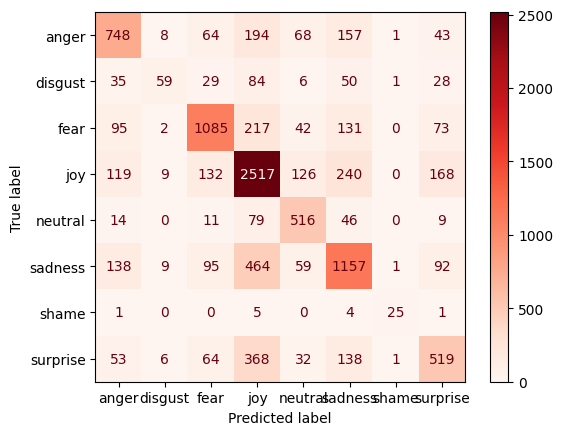

In [14]:
graph = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
graph.plot(cmap='Reds',values_format='d')

#### Calculating the classification report of the model

In [15]:
print("Classification Report of the model :")
print(classification_report(y_test,pred))

Classification Report of the model :
              precision    recall  f1-score   support

       anger       0.62      0.58      0.60      1283
     disgust       0.63      0.20      0.31       292
        fear       0.73      0.66      0.69      1645
         joy       0.64      0.76      0.70      3311
     neutral       0.61      0.76      0.68       675
     sadness       0.60      0.57      0.59      2015
       shame       0.86      0.69      0.77        36
    surprise       0.56      0.44      0.49      1181

    accuracy                           0.63     10438
   macro avg       0.66      0.58      0.60     10438
weighted avg       0.63      0.63      0.63     10438

